# Lorenz system

In [1]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import control
import re, seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

np.random.seed(0)

In [2]:
def f_nl(x):
    return np.array([0, -x[0] * x[2], x[0] * x[1]])

In [3]:
MLor = np.array([[-10,10,0],[28,-1,0],[0,0,-8/3]])
B = np.array([[1],[1],[1]])
P = np.array([-1, -2, -3])
u_control_lorenz = control.acker(MLor, B, P)
model1 = MLPRegressor(activation='logistic').fit([[-1, -5, -3]], [0.0])
model2 = MLPRegressor(activation='logistic').fit([[-1, -5, -3]], [-3.0])
model3 = MLPRegressor(activation='logistic').fit([[-1, -5, -3]], [5.0])
print('Feedback gain matrix k = {0}'.format(u_control_lorenz))

Feedback gain matrix k = [[-2.08669202e+01  1.32015209e+01 -1.26742712e-03]]


In [4]:
def approximated_lorenz(q, M, B, u_control):
    global model1, model2, model3
    y_pred = f_nl(q)
    f_nl_error = y_pred - np.array([model1.predict([q])[0], model2.predict([q])[0], model3.predict([q])[0]])
    M_stab = M.dot(q) - B.dot(u_control).dot(q)
    xst = M_stab + f_nl_error
    model1 = model1.partial_fit([q], [y_pred[0]])
    model2 = model2.partial_fit([q], [y_pred[0]])
    model3 = model3.partial_fit([q], [y_pred[0]])
    return np.array(xst)

In [5]:
N = 10_000
t = np.linspace(0, 20, N, endpoint=True)
ns = len(t)
xs = np.empty(ns)
ys = np.empty(ns)
zs = np.empty(ns)

xs[0], ys[0], zs[0] = (-1, -5, -3)
for i in tqdm(range(ns - 1)):
    current_point = np.array([xs[i], ys[i], zs[i]])
    dt = t[i+1] - t[i]
    xt, yt, zt = approximated_lorenz(current_point, MLor, B, u_control_lorenz)
    xs[i + 1] = xs[i] + (xt * dt)
    ys[i + 1] = ys[i] + (yt * dt)
    zs[i + 1] = zs[i] + (zt * dt)
    
print(xs[ns-1], ys[ns-1], zs[ns-1])

100%|██████████████████████████████████████| 9999/9999 [00:51<00:00, 193.94it/s]


-2.5293008745103035e-06 -8.74997370811407e-06 2.7282239213691967e-05


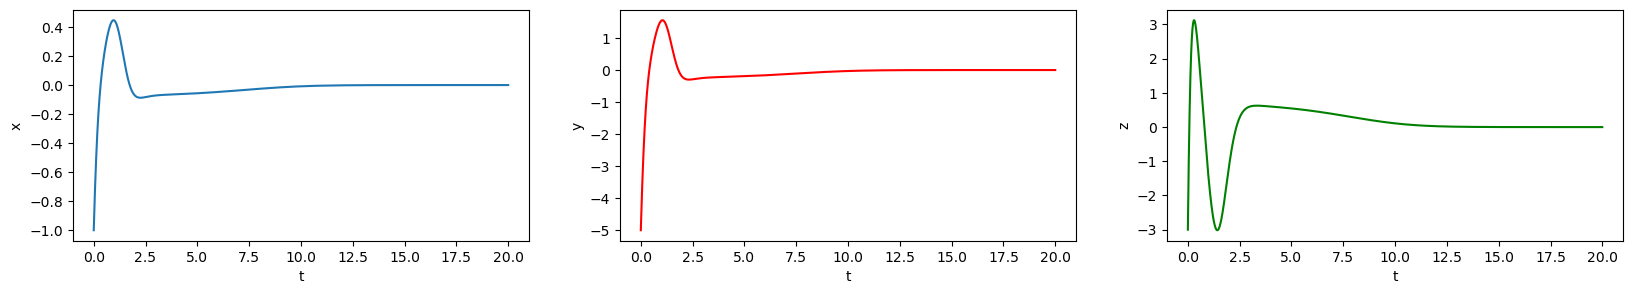

In [6]:
plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.plot(t, xs)
plt.xlabel("t")
plt.ylabel("x");


plt.subplot(132)
plt.plot(t, ys, color = 'r')
plt.xlabel("t")
plt.ylabel("y");

plt.subplot(133)
plt.plot(t, zs, color = 'g')
plt.xlabel("t")
plt.ylabel("z");

# Rossler system

In [7]:
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import control
import re, seaborn as sns
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt
import math as mth

In [8]:
def f1_nl(x):
    return np.array([0, 0, x[0] * x[2]])

In [9]:
a = 0.3
b = 0.2
c = 5.4
x_eq_1 = 0.5 * (c + mth.sqrt((c) ** 2 - 4 * a * b)) 
z_eq_2 = 0.5 * (c - mth.sqrt((c) ** 2 - 4 * a * b))/a
#print("x_+=",x_eq_1,"z_-=", z_eq_2)

MRos = np.array([[0,-1,-1],[1,0.3,0],[z_eq_2,0,-x_eq_1]])

B = np.array([[1],[1],[1]])

P = np.array([-1, -2, -3])

u_control_rossler = control.acker(MRos, B, P)

model1 = MLPRegressor(activation='logistic').fit([[1., 1., 1.]], [0.])
model2 = MLPRegressor(activation='logistic').fit([[1., 1., 1.]], [0.])
model3 = MLPRegressor(activation='logistic').fit([[1., 1., 1.]], [1.])

print('Feedback gain matrix k = {0}'.format(u_control_rossler))

Feedback gain matrix k = [[ 0.68219602  1.43308385 -1.2041458 ]]


In [10]:
def approximated_rossler(q, M, B, u_control):
    global model1, model2, model3
    y_pred = f1_nl(q)
    f1_nl_error = y_pred - np.array([model1.predict([q])[0], model2.predict([q])[0], model3.predict([q])[0]])

    model1 = model1.partial_fit([q], [y_pred[0]])
    model2 = model2.partial_fit([q], [y_pred[1]])
    model3 = model3.partial_fit([q], [y_pred[2]])

    M_stab = M.dot(q) - B.dot(u_control).dot(q)
    xst = M_stab + f1_nl_error
    return np.array(xst)

In [11]:
t = np.linspace(0, 20, int(10000), endpoint=True)
ns = len(t)
xs = np.empty(ns)
ys = np.empty(ns)
zs = np.empty(ns)
xs[0], ys[0], zs[0] = (1, 1, 1)
for i in tqdm(range(ns - 1)):
    current_point = np.array([xs[i], ys[i], zs[i]])
    xt, yt, zt = approximated_rossler(current_point, MRos, B, u_control_rossler)
    dt = t[i + 1] - t[i]
    xs[i + 1] = xs[i] + (xt * dt)
    ys[i + 1] = ys[i] + (yt * dt)
    zs[i + 1] = zs[i] + (zt * dt)
print(xs[ns-1],ys[ns-1],zs[ns-1])

100%|██████████████████████████████████████| 9999/9999 [00:52<00:00, 190.92it/s]


9.933085147841247e-07 -1.7456005640268332e-07 -2.225070336709007e-08


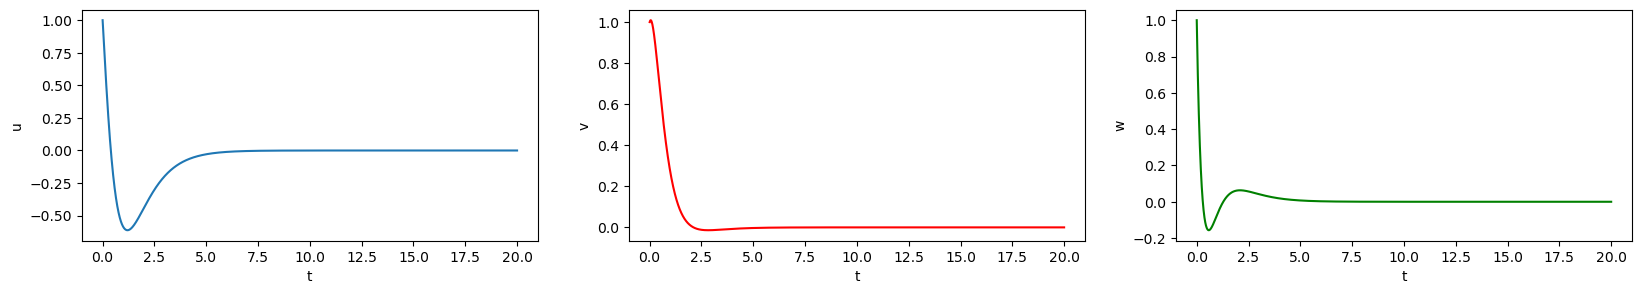

In [12]:
plt.figure(figsize=(20, 3))

plt.subplot(131)
plt.plot(t, xs)
plt.xlabel("t")
plt.ylabel("u");


plt.subplot(132)
plt.plot(t, ys, color = 'r')
plt.xlabel("t")
plt.ylabel("v");

plt.subplot(133)
plt.plot(t, zs, color = 'g')
plt.xlabel("t")
plt.ylabel("w");